# Charged particle motion and radiation in strong electromagnetic fields

Authors of paper: A. Gonoskov, T. G. Blackburn, M. Marklund, S. S. Bulanov

Link to paper: https://link.aps.org/doi/10.1103/RevModPhys.94.045001

Notebook: [Óscar Amaro](https://github.com/OsAmaro) (10 Oct 2024)

Here we reproduce figure 6 of the classical and quantum power spectra of an accelerating charge.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import json
from numpy import log, log10, sin, cos, exp, sqrt, pi, heaviside
from tqdm import trange
from scipy.interpolate import interp1d
from scipy.special import kv, erf, gamma
from scipy.integrate import quad
from scipy.constants import alpha, hbar

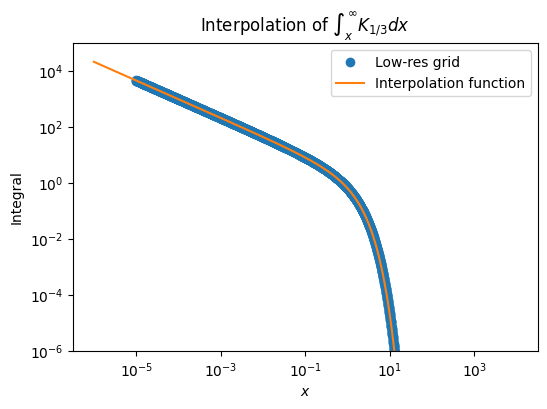

In [27]:
# Step 1: Define known data points (low resolution grid)
def get_kv53(x): return quad(lambda xx: kv(5/3,xx), x, np.inf)[0]; #get_kv13 = np.vectorize(get_kv13)
x_low_res = np.logspace(-5, 3, 3000)  # 
y_low_res = np.array([get_kv53(x) for x in x_low_res])        # Function values at known points
# Step 2: Create an interpolation function (linear interpolation by default)
interp_func = interp1d(x_low_res, y_low_res, kind='linear')  # You can also use 'cubic', 'quadratic', etc.
def get_kv53_int(x): 
    # x->0 has a well defined asymptote
    if x<= np.min(x_low_res): return 2**(2/3)*pi*gamma(-1/3)/(sqrt(3) * x**(2/3) * gamma(-2/3)*gamma(2/3))
    elif x>= np.max(x_low_res): return y_low_res[-1]
    else:
        return interp_func(x)
get_kv53_int = np.vectorize(get_kv53_int)

# plot and compare 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
x_high_res = np.logspace(-6, 4, int(len(x_low_res)*10) )  #
axes.plot(x_low_res, y_low_res, 'o', label='Low-res grid')
axes.plot(x_high_res, get_kv53_int(x_high_res), label='Interpolation function')
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel(r'$x$')
axes.set_ylabel(r'Integral')
axes.set_ylim([1e-6,1e5])
axes.set_title(r'Interpolation of $\int_x^\infty K_{1/3} dx$')
axes.legend()
plt.show()

/var/folders/g9/q9xn_4ss3hs29n0vyt5vnvgw0000gn/T/ipykernel_3218/3471812136.py:9: RuntimeWarning: invalid value encountered in scalar power
  if x<= np.min(x_low_res): return 2**(2/3)*pi*gamma(-1/3)/(sqrt(3) * x**(2/3) * gamma(-2/3)*gamma(2/3))


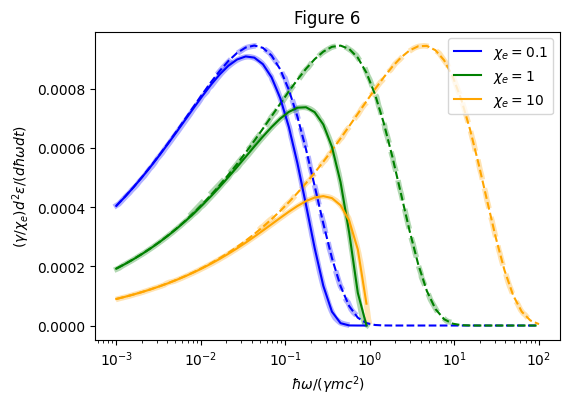

In [60]:
# Plot first data from Paper
alphaWPD = 0.3
linewWPD = 4
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
f = open('dataWPD/fig6/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', alpha=alphaWPD, linewidth=linewWPD, color='blue')
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', alpha=alphaWPD, linewidth=linewWPD, color='blue')
#
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', alpha=alphaWPD, linewidth=linewWPD, color='green')
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', alpha=alphaWPD, linewidth=linewWPD, color='green')
#
datatmp = data['datasetColl'][4]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', alpha=alphaWPD, linewidth=linewWPD, color='orange')
datatmp = data['datasetColl'][5]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', alpha=alphaWPD, linewidth=linewWPD, color='orange')


# Numerics
def fig6_cl(x, chie):
    xi = 2/3 * x/chie
    return alpha/(sqrt(3)*pi)/chie * x * get_kv53_int(xi) /1.95
def fig6_q(x, chie):
    xi = 2/3 * x/chie/(1-x)
    return alpha/(sqrt(3)*pi)/chie * x * get_kv53_int(xi) /1.95
# multiplicative correcting factor of ~2 to reproduce the data
xlst = np.logspace(-3, 2, 50) # hbar omega / gamma m c^2
# classical
y01 = np.array([fig6_cl(x, 0.1) for x in xlst])
y1 = np.array([fig6_cl(x, 1) for x in xlst])
y10 = np.array([fig6_cl(x, 10) for x in xlst])
plt.plot(xlst, y01, '--', color='blue')
plt.plot(xlst, y1, '--', color='green')
plt.plot(xlst, y10, '--', color='orange')
# quantum cutoff
y01 = np.array([fig6_q(x, 0.1) for x in xlst])
y1 = np.array([fig6_q(x, 1) for x in xlst])
y10 = np.array([fig6_q(x, 10) for x in xlst])
plt.plot(xlst, y01, '-', color='blue', label=r'$\chi_e=0.1$')
plt.plot(xlst, y1, '-', color='green', label=r'$\chi_e=1$')
plt.plot(xlst, y10, '-', color='orange', label=r'$\chi_e=10$')
plt.legend()
plt.xscale('log')
plt.xlabel(r"$\hbar \omega/(\gamma m c^2)$")
plt.ylabel(r"$(\gamma/\chi_e) d^2 \varepsilon/(d\hbar \omega dt)$")
plt.title("Figure 6")
plt.show()